### Project Brief

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


In [1]:
# Note that all source file to be placed under the data folder in presetn directory.
import os
os.listdir("data/")

['Countries_where_English_is_an_official_language.pdf',
 'rounds2.csv',
 'mapping.csv',
 'companies.txt']

In [2]:
import PyPDF2

# reading the pdf file
pdf_object = open('data/Countries_where_English_is_an_official_language.pdf', 'rb')
pdf_reader = PyPDF2.PdfFileReader(pdf_object)

# Number of pages in the PDF file
print(pdf_reader.numPages)

# get a certain page's text
page_object = pdf_reader.getPage(0)

# Extract text from the page_object
print(page_object.extractText())

1
ListofcountrieswhereEnglishisanofficiallanguage
AfricaBotswanaCameroonEthiopiaEritrea
TheGambiaGhanaKenyaLesothoLiberiaMalawiMauritiusNamibiaNigeriaRwandaSeychellesSierraLeone
SouthAfricaSouthSudanSudanSwazilandTanzaniaUgandaZambiaZimbabwe
AmericasAntiguaandBarbudaTheBahamas
BarbadosBelizeCanadaDominicaGrenadaGuyanaJamaicaSaintKittsandNevisSaintLuciaSaintVincentandtheGrenadinesTrinidadandTobago
UnitedStates

AsiaIndiaPakistanPhilippinesSingaporeAustralia/OceaniaAustraliaFijiKiribatiMarshallIslandsFederatedStates
ofMicronesiaNauruNewZealand
PalauPapuaNewGuineaSamoaSolomonIslands
TongaTuvaluVanuatu
EuropeIrelandMaltaUnitedKingdom



#### The data is very much unstructured and will not be able to read them into a table. We will lookup later to see if this info needs to be converted to structred format.


In [3]:
import pandas as pd
# Lets load the companies and rounds into dataframes
companies = pd.read_csv("data/companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds = pd.read_csv("data/rounds2.csv", encoding = "ISO-8859-1")

Lets explore the data

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Panel-Systems,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
rounds.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [8]:
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [9]:
rounds.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [10]:
# Lets determine the unique company name
print(len(companies.name.unique()))

66103


In [11]:
print(len(companies.permalink.unique()))

66368


In [12]:
print(len(rounds.company_permalink.unique()))

90247


In [13]:
# It is observed that the company_permalink is case sensitive in the source data, normalize and get unique count
print(len(rounds['company_permalink'].str.lower().unique()))

66370


** Lets view rows with same company name. This is just to ensure that the number or unique company name is less than the number of unique permalink **



In [14]:
pd.concat(names for _, names in companies.groupby("name") if len(names) > 1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/Organization/3Divaz-2,3DIVAZ,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/Organization/3Divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
3942,/Organization/Aps,APS,http://www.aps.com,Clean Technology,operating,NaN,NaN,NaN,NaN,NaN
3943,/Organization/Aps-Llc,APS,NaN,Real Estate,operating,USA,GA,Macon,Griffin,31-03-2011
3982,/Organization/Apx,APX,http://www.apxgroup.com,Clean Technology,operating,NLD,7,Amsterdam,Amsterdam,01-01-1999
3983,/Organization/Apx-2,APX,http://www.apx.com/,Energy Management|Environmental Innovation,operating,USA,CA,SF Bay Area,San Jose,NaN
1526,/Organization/Adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/Organization/Adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/Organization/Agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
1996,/Organization/Agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013


** This data shows that the same compnay exisits under different category and/or country, so we will not worry about it as we will be looking more closely using permalink and investment realted to company that each exist as seprate entity **

In [15]:
# Lets clean up the fileds on which we are going to merge the tables
companies['permalink'] = companies['permalink'].str.lower()

In [16]:
# now the unique count should be same without having to use lower
print(len(companies.permalink.unique()))

66368


In [17]:
rounds['permalink'] = rounds['company_permalink'].str.lower()

In [18]:
# now the unique count should be same without having to use lower
print(len(rounds.permalink.unique()))

66370


**(66370 - 66368) **
So there are 2 compaines information missing that have information in rounds2 table.

In [22]:
round_left_join = pd.merge(rounds, companies, how='left', on='permalink', indicator=True)

In [23]:
left_only = round_left_join[round_left_join['_merge'] != 'both']
left_only

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN,/organization/e-cãbica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN,/organization/energystone-games-çµç³æ¸¸æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN,/organization/huizuche-com-æ ç§ÿè½¦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0,/organization/magnet-tech-ç£ç³ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN,/organization/weiche-tech-åè½¦ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN,/organization/zengame-ç¦ æ¸¸ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [24]:
# number of entires on the rounds2 table with no matching entires in company table
len(left_only)

7

In [25]:
# Total number of rows on the rounds table
len(rounds)

114949

So there should be **(114949-7)** rows in our merged table.

In [26]:
master_frame = pd.merge(companies, rounds , how='inner', on='permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [27]:
# total entire in the merged table
master_frame.shape

(114942, 16)

In [28]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [29]:
master_frame.isnull().any()

permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
dtype: bool

In [30]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [31]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [32]:
# removing non-contributing and duplicate columns column
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

In [33]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

It would be ideal to remove the rows for which the raised_amount_usd is Nan. Wihtout this info the row data is almost useless to our analysis.

In [34]:
import numpy as np

# removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]


In [35]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

At this point we have 6 columns with missing data. 
** I would be hesitent to remove any more row data as we have the raised_amount_usd info for all remaining rows. **
We could ignore the missing values of state_code, region and city as they do not bring any value for our final analysis


In [36]:
master_frame[master_frame.isnull().sum(axis=1) > 6].shape

(0, 13)

There are no rows missing all the 6 fields data. So we can safely say we have arrived at our gold master data

In [37]:
# count the number of rows having > 5 missing values
# using len(master_frame.index)
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

191

In [38]:
# calculate the percentage
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.20114155732007835

In [ ]:
# lets furture remove some of the columns which does not contribute to our current analysis
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [39]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [40]:
# fraction of rows lost
len(master_frame.index)/114942

0.8261384002366411

we have lost about 18% of the source data after data cleaning

In [41]:
master_frame['category_list'].describe()

count             93914
unique            23484
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [42]:
master_frame['country_code'].describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

In [43]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [44]:
# imputing NaNs by UNK - as unknow for now
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'UNK'

In [45]:
# imputing NaNs by undefined - for now for category_list
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "undefined"

In [46]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              0.00
status                     0.00
country_code               0.00
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity).

Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [47]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
# averages

funding_round_type
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
secondary_market         7.964963e+07
private_equity           7.330859e+07
undisclosed              1.924237e+07
debt_financing           1.704353e+07
venture                  1.174895e+07
grant                    4.300576e+06
convertible_note         1.453439e+06
product_crowdfunding     1.363131e+06
angel                    9.586945e+05
seed                     7.197796e+05
equity_crowdfunding      5.383682e+05
non_equity_assistance    4.112031e+05
Name: raised_amount_usd, dtype: float64

In [48]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
# medians

funding_round_type
secondary_market         32600000.0
private_equity           20000000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1018680.0
angel                      400000.0
seed                       275000.0
convertible_note           272000.0
grant                      201684.0
product_crowdfunding       183915.0
equity_crowdfunding        100000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

In [49]:
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

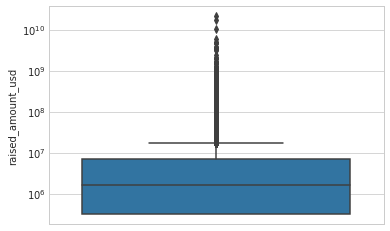

In [50]:
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

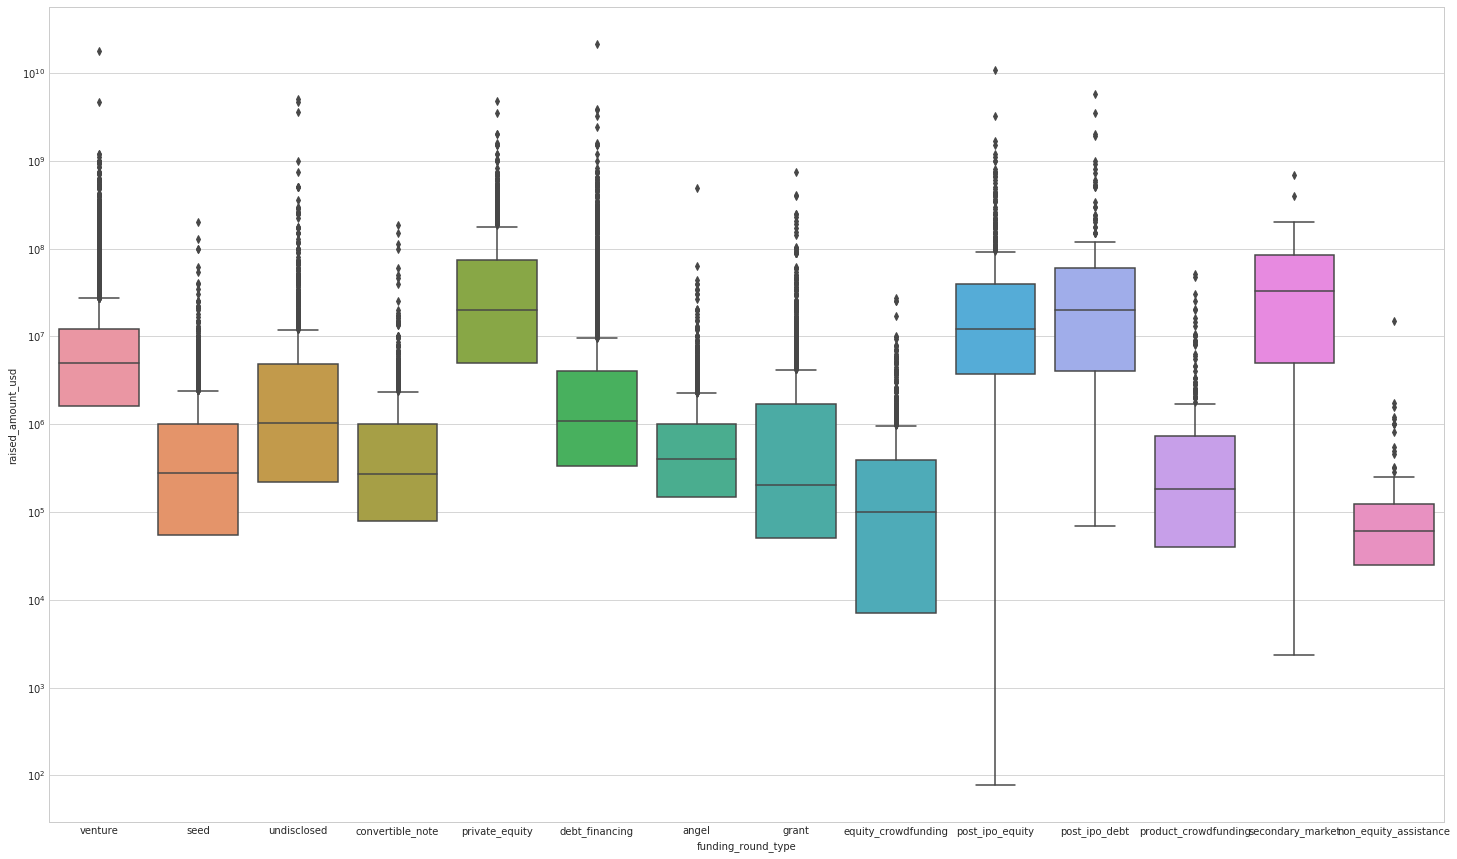

In [51]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(25, 15))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

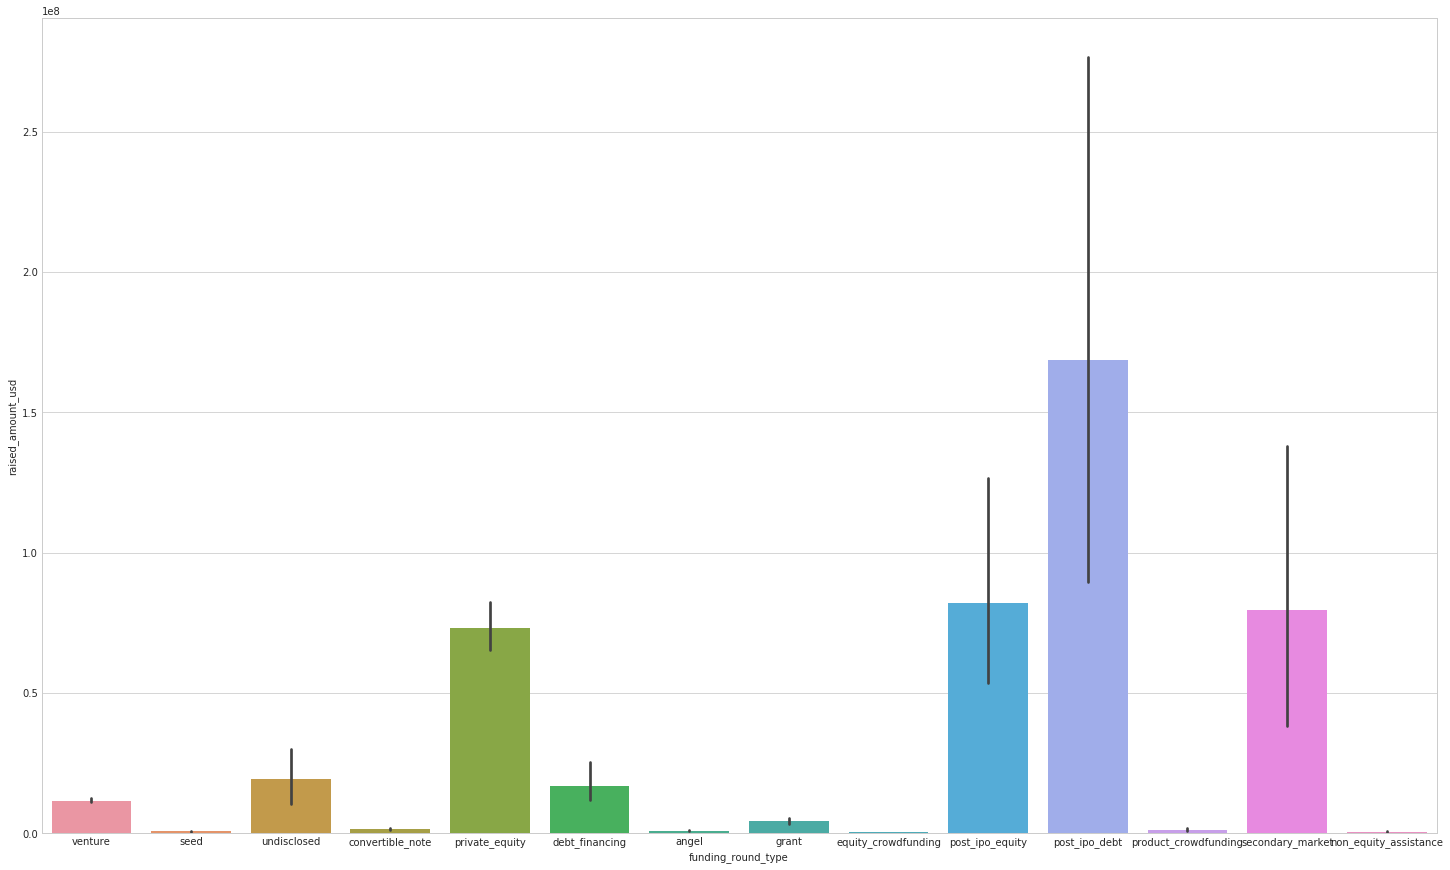

In [52]:
# bar plot with default statistic=mean
plt.figure(figsize=(25, 15))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

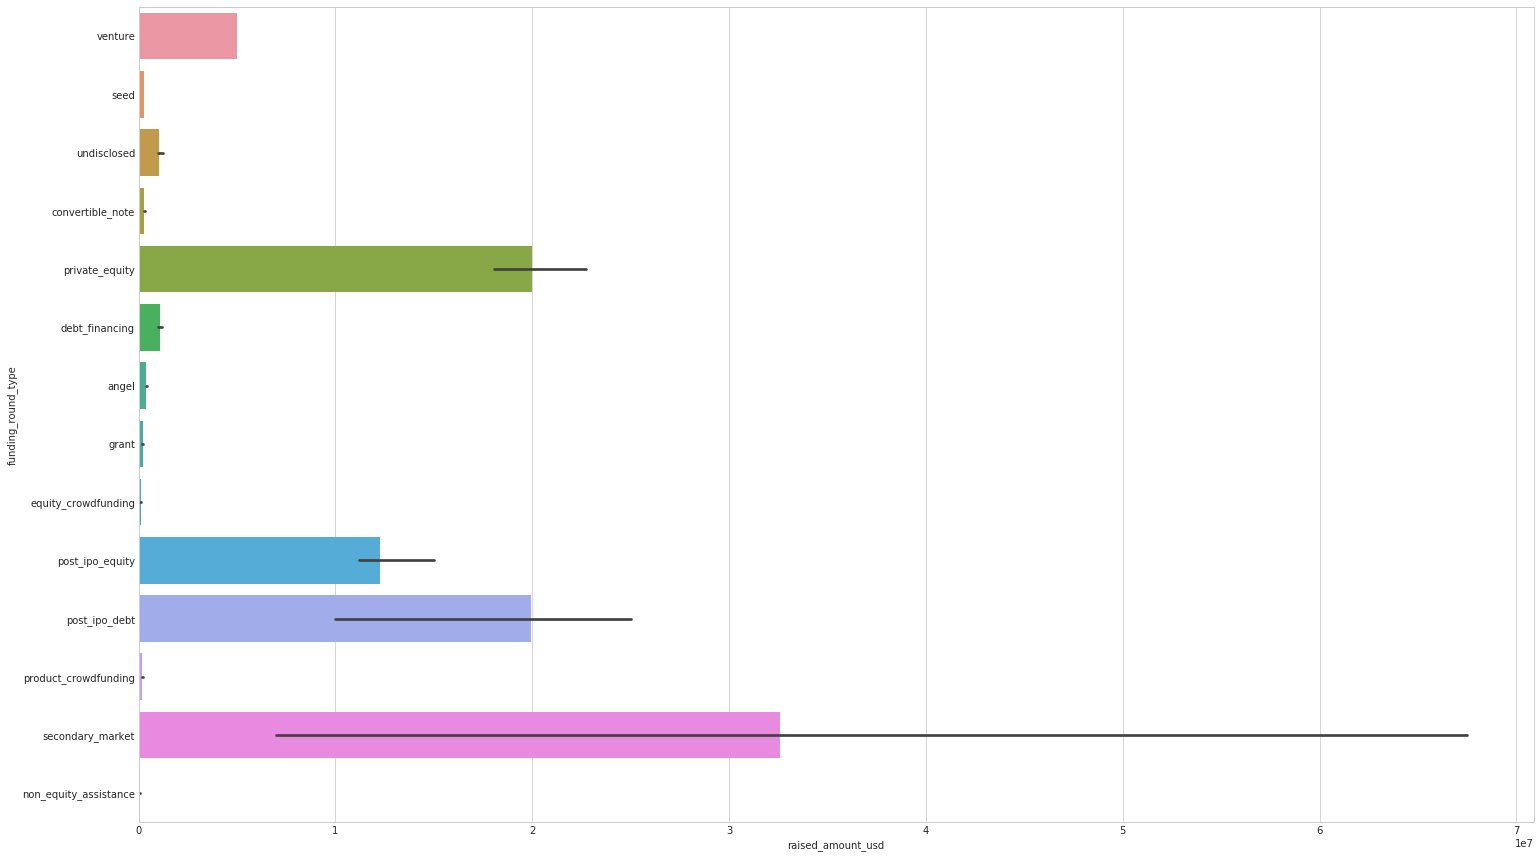

In [53]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(25, 15))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

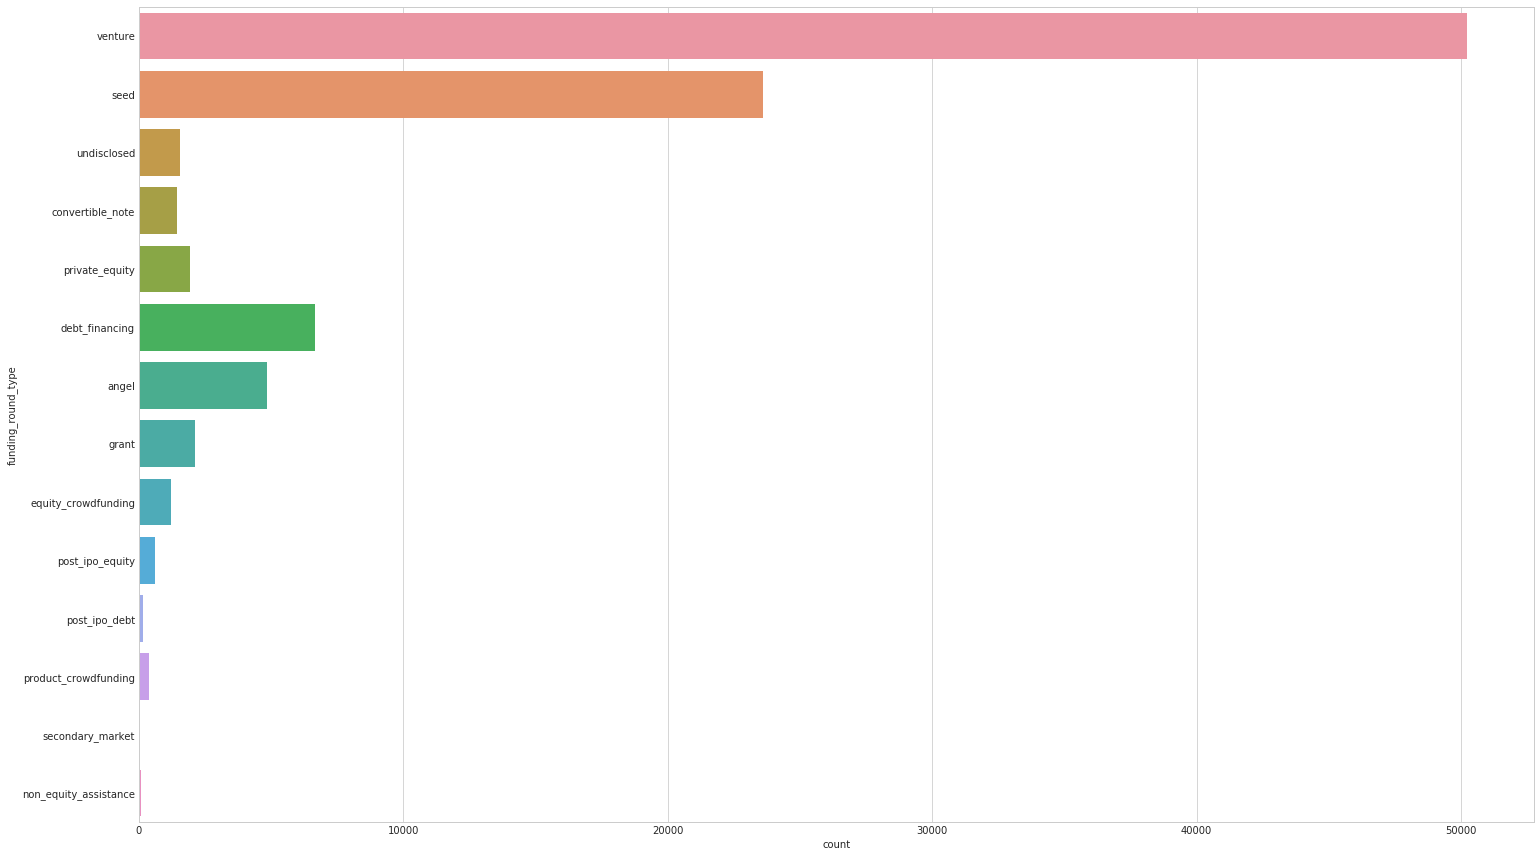

In [54]:
# Plotting count across a categorical variable 
plt.figure(figsize=(25, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

In [55]:
#Lets now restric oour master frame to only contain the 4 type of funding rounds

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

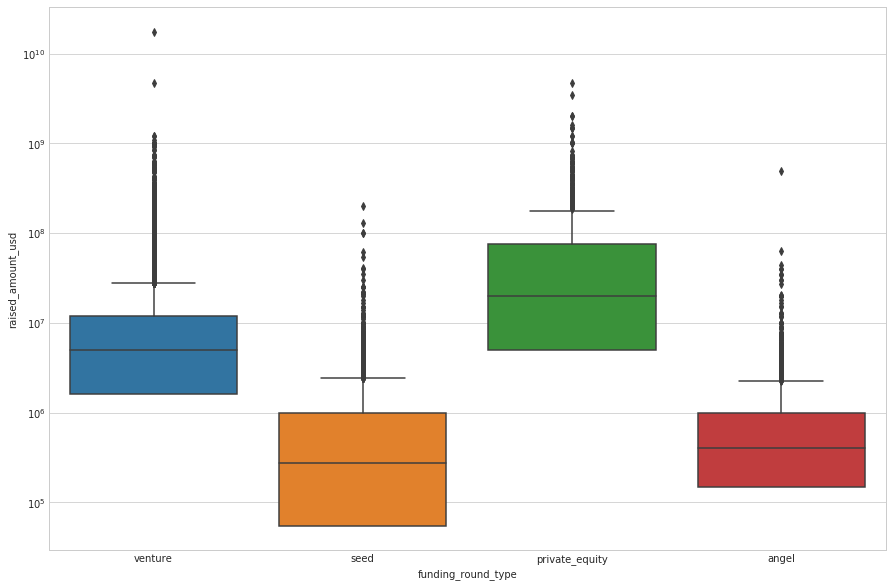

In [56]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

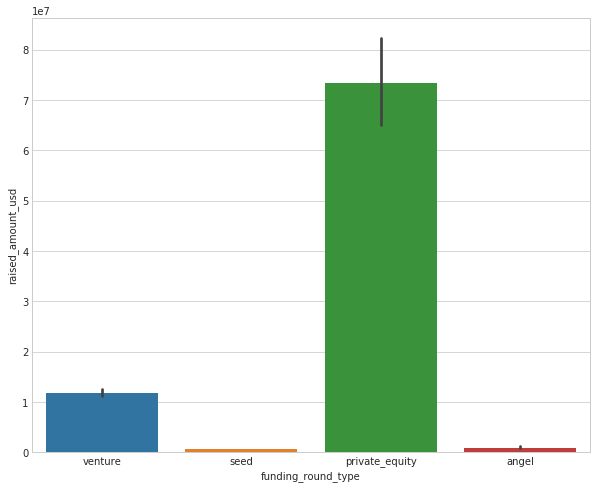

In [57]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

In [58]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
#averages.

funding_round_type
private_equity    7.330859e+07
venture           1.174895e+07
angel             9.586945e+05
seed              7.197796e+05
Name: raised_amount_usd, dtype: float64

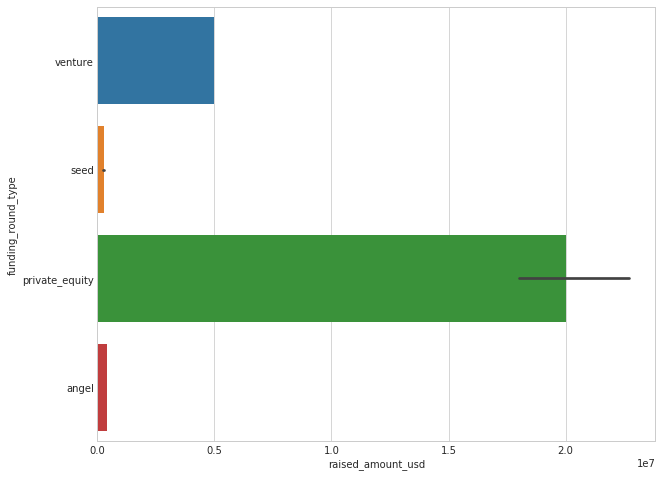

In [60]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

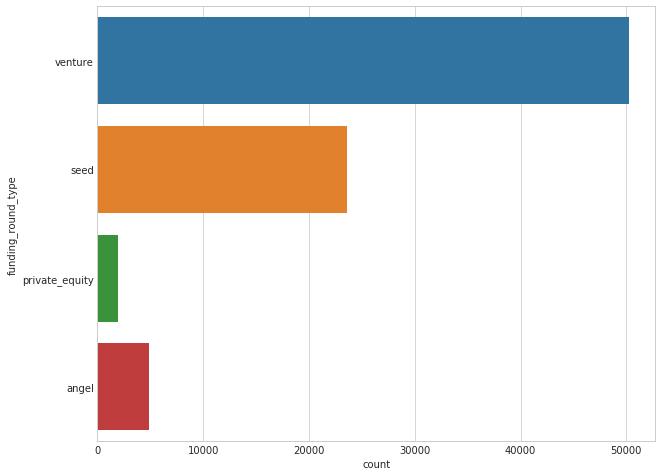

In [61]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

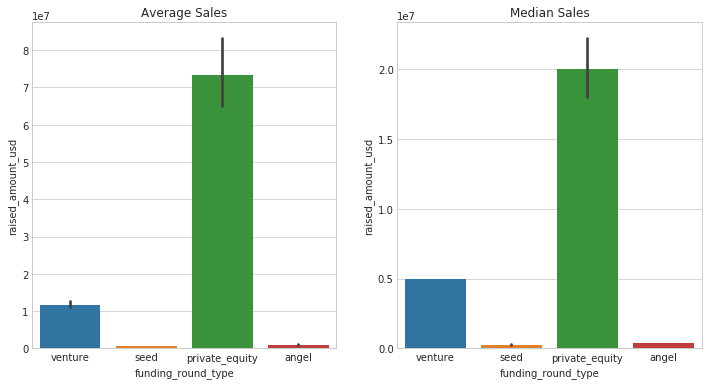

In [75]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.title("Average Sales")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.title("Median Sales")

plt.show()

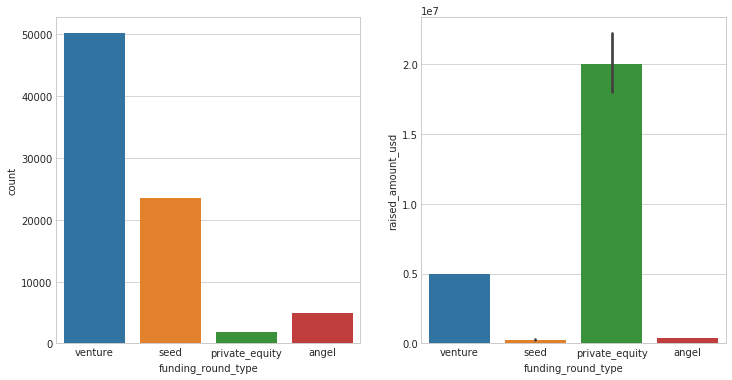

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

From above chart it seems that many are investing in venture and they fall in the bracket of 5 to 15 million which spark fund have budgeted for. 